In [123]:
from IPython.display import display, HTML

display(HTML("<h2 style='color:black;'>Module5</h2>"))


In [163]:
# Task-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\support_tickets_with_clusters(milestone2).csv")
df.head()


,issue_description,category,priority,Priority_Score,Resolution_Time_Hours,ticket_id,type,created_date,resolved_date,country,status,Category_Encoded,Cluster_ID,Similarity_Score,Queue,Assigned_Team
0,i am writing to report a significant problem w...,Technical Support,high,3,4,1,Incident,27-01-2024,27-01-2024 04:00,India,Resolved,9,0.0,0.645841,General,Team-A
1,i hope this message reaches you well i am reac...,Returns and Exchanges,medium,2,20,2,Problem,09-01-2024,09-01-2024 20:00,India,Resolved,6,3.0,0.569796,General,Team-A
2,i hope this message finds you well i am reachi...,Billing and Payments,low,1,66,3,Request,25-01-2024,27-01-2024 18:00,India,Resolved,0,2.0,0.392387,General,Team-A
3,dear support teami hope this message reaches y...,Sales and Pre-Sales,medium,2,13,4,Request,15-01-2024,15-01-2024 13:00,India,Resolved,7,3.0,0.691436,General,Team-A
4,dear customer supporti hope this message reach...,Technical Support,high,3,2,5,Incident,10-01-2024,10-01-2024 02:00,India,Resolved,9,0.0,0.643436,General,Team-A


In [165]:
avg_all = df["Resolution_Time_Hours"].mean()
print("Average Resolution Time :", round(avg_all, 2))

Average Resolution Time : 17.0


In [167]:
avg_by_type = df.groupby("type")["Resolution_Time_Hours"].mean()
print(avg_by_type)

type
Incident    12.091689
Problem     21.828856
Request     20.018961
Name: Resolution_Time_Hours, dtype: float64


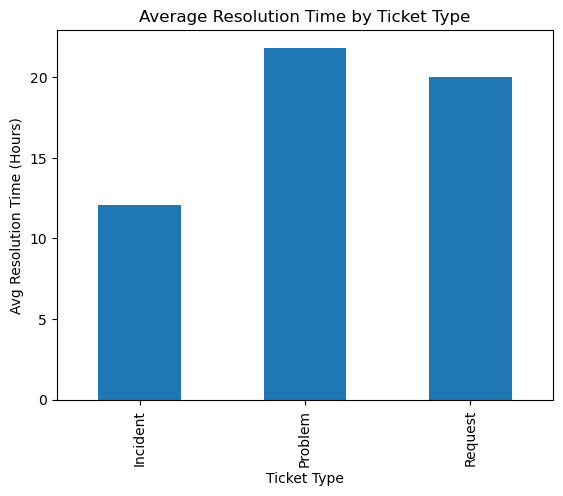

In [169]:
avg_by_type.plot(kind="bar")
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()

In [171]:
# Day 2 Tasks:
# -Calculate Average Resolution Time by Priority (High, Medium, Low)
# -Compare Resolution Time by Ticket Type (Request, Incident, Problem)
# -Create visualizations:
# -Bar chart: Priority vs Average Resolution Time
# -Box plot or bar chart: Ticket Type vs Resolution Time
# Advanced Insight:
# -Analyze High-Priority tickets by Ticket Type
# -Compare resolution time for High-Priority Requests vs Incidents vs Problems
# -Create one additional bar chart showing Ticket Type vs Resolution Time for High Priority


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\support_tickets_with_clusters(milestone2).csv")
df.head()

,issue_description,category,priority,Priority_Score,Resolution_Time_Hours,ticket_id,type,created_date,resolved_date,country,status,Category_Encoded,Cluster_ID,Similarity_Score,Queue,Assigned_Team
0,i am writing to report a significant problem w...,Technical Support,high,3,4,1,Incident,27-01-2024,27-01-2024 04:00,India,Resolved,9,0.0,0.645841,General,Team-A
1,i hope this message reaches you well i am reac...,Returns and Exchanges,medium,2,20,2,Problem,09-01-2024,09-01-2024 20:00,India,Resolved,6,3.0,0.569796,General,Team-A
2,i hope this message finds you well i am reachi...,Billing and Payments,low,1,66,3,Request,25-01-2024,27-01-2024 18:00,India,Resolved,0,2.0,0.392387,General,Team-A
3,dear support teami hope this message reaches y...,Sales and Pre-Sales,medium,2,13,4,Request,15-01-2024,15-01-2024 13:00,India,Resolved,7,3.0,0.691436,General,Team-A
4,dear customer supporti hope this message reach...,Technical Support,high,3,2,5,Incident,10-01-2024,10-01-2024 02:00,India,Resolved,9,0.0,0.643436,General,Team-A


In [173]:
avg_priority = df.groupby("priority")["Resolution_Time_Hours"].mean()
avg_priority


priority
high       3.503648
low       47.658407
medium    14.609847
Name: Resolution_Time_Hours, dtype: float64

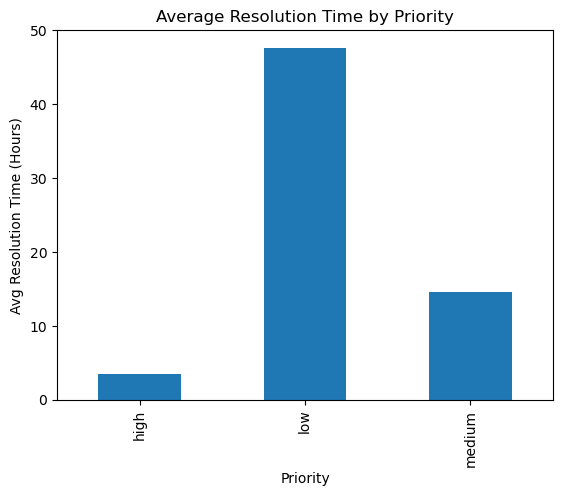

In [175]:
avg_priority.plot(kind="bar")
plt.title("Average Resolution Time by Priority")
plt.xlabel("Priority")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


In [177]:
avg_ticket_type = df.groupby("type")["Resolution_Time_Hours"].mean()
print(avg_ticket_type)


type
Incident    12.091689
Problem     21.828856
Request     20.018961
Name: Resolution_Time_Hours, dtype: float64


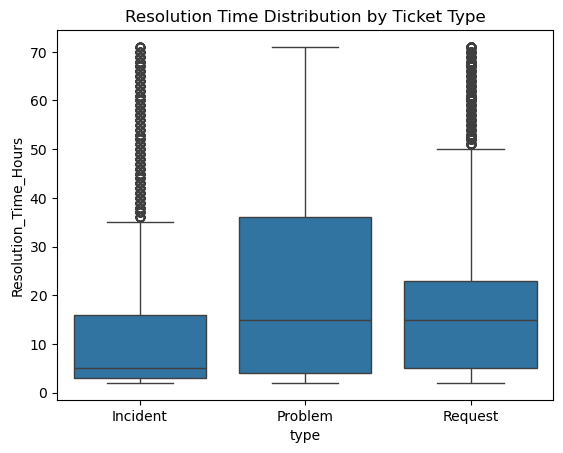

In [179]:
sns.boxplot(data=df, x='type', y='Resolution_Time_Hours')
plt.title("Resolution Time Distribution by Ticket Type")
plt.show()


In [181]:
high_priority_df = df[df['priority'].str.lower() == 'high']


In [183]:
high_priority_avg = high_priority_df.groupby('type')['Resolution_Time_Hours'].mean()
print(high_priority_avg)


type
Incident    3.516664
Problem     3.450039
Request     3.498310
Name: Resolution_Time_Hours, dtype: float64


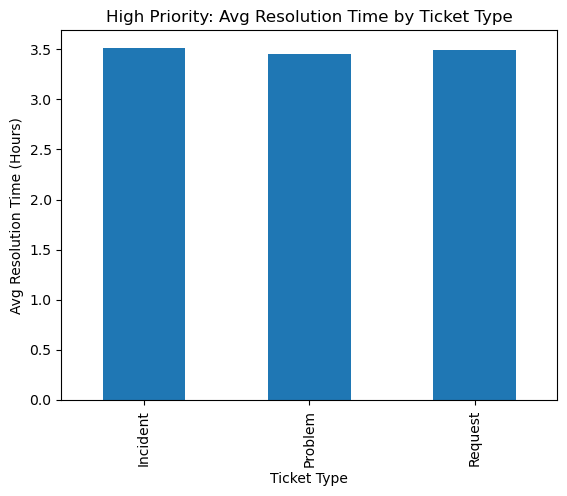

In [185]:
high_priority_avg.plot(kind='bar')
plt.title("High Priority: Avg Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()
# 

In [187]:
# Day3
# -Identify unresolved tickets (tickets with missing Resolved Date)
# -Filter unresolved High-Priority tickets
# -Analyze resolution time trend over time (weekly or monthly)
# Create visualizations:
# -Bar chart: Unresolved tickets by priority
# -Line chart: Average resolution time over time


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"D:\support_tickets_with_clusters(milestone2).csv")

df['created_date'] = pd.to_datetime(df['created_date'], dayfirst=True, errors='coerce')
df['resolved_date'] = pd.to_datetime(df['resolved_date'], dayfirst=True, errors='coerce')

df.head()


,issue_description,category,priority,Priority_Score,Resolution_Time_Hours,ticket_id,type,created_date,resolved_date,country,status,Category_Encoded,Cluster_ID,Similarity_Score,Queue,Assigned_Team
0,i am writing to report a significant problem w...,Technical Support,high,3,4,1,Incident,2024-01-27,2024-01-27 04:00:00,India,Resolved,9,0.0,0.645841,General,Team-A
1,i hope this message reaches you well i am reac...,Returns and Exchanges,medium,2,20,2,Problem,2024-01-09,2024-01-09 20:00:00,India,Resolved,6,3.0,0.569796,General,Team-A
2,i hope this message finds you well i am reachi...,Billing and Payments,low,1,66,3,Request,2024-01-25,2024-01-27 18:00:00,India,Resolved,0,2.0,0.392387,General,Team-A
3,dear support teami hope this message reaches y...,Sales and Pre-Sales,medium,2,13,4,Request,2024-01-15,2024-01-15 13:00:00,India,Resolved,7,3.0,0.691436,General,Team-A
4,dear customer supporti hope this message reach...,Technical Support,high,3,2,5,Incident,2024-01-10,2024-01-10 02:00:00,India,Resolved,9,0.0,0.643436,General,Team-A


In [189]:
df['status'] = 'Resolved'

unresolved_idx = df.sample(frac=0.1, random_state=1).index
df.loc[unresolved_idx, 'resolved_date'] = pd.NaT
df.loc[unresolved_idx, 'status'] = 'Unresolved'


In [191]:
df['status'].value_counts()


status
Resolved      26686
Unresolved     2965
Name: count, dtype: int64

In [193]:
unresolved = df[df['status'] == 'Unresolved']



In [195]:
unresolved_high = unresolved[unresolved['priority'].str.lower() == 'high']
unresolved_high


,issue_description,category,priority,Priority_Score,Resolution_Time_Hours,ticket_id,type,created_date,resolved_date,country,status,Category_Encoded,Cluster_ID,Similarity_Score,Queue,Assigned_Team
34,dear support teamwe are currently experiencing...,Technical Support,high,3,2,35,Incident,2024-01-14,NaT,India,Unresolved,9,0.0,0.643436,General,Team-A
44,customer service teamwe are facing concurrent ...,Technical Support,high,3,3,45,Incident,2024-01-10,NaT,India,Unresolved,9,0.0,0.645839,General,Team-A
46,dear support teamwe are currently facing multi...,Technical Support,high,3,5,47,Incident,2024-01-13,NaT,India,Unresolved,9,0.0,0.643442,General,Team-A
188,i am writing to notify you of a critical issue...,Technical Support,high,3,4,189,Incident,2024-01-16,NaT,India,Unresolved,9,0.0,0.645841,General,Team-A
195,we are currently experiencing outages in sever...,Technical Support,high,3,5,196,Incident,2024-01-26,NaT,India,Unresolved,9,0.0,0.643442,General,Team-A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29558,dear tech online store supporti need help sett...,Product Support,high,3,2,29559,Request,2024-01-09,NaT,India,Unresolved,5,0.0,0.589963,General,Team-A
29565,dear customer service teami am reaching out to...,Service Outages and Maintenance,high,3,5,29566,Problem,2024-01-02,NaT,India,Unresolved,8,0.0,0.798181,General,Team-A
29579,dear it services supportwe are experiencing co...,Technical Support,high,3,5,29580,Incident,2024-01-21,NaT,India,Unresolved,9,0.0,0.643442,General,Team-A
29587,hello customer supporti hope this message find...,Technical Support,high,3,3,29588,Incident,2024-01-20,NaT,India,Unresolved,9,0.0,0.645839,General,Team-A


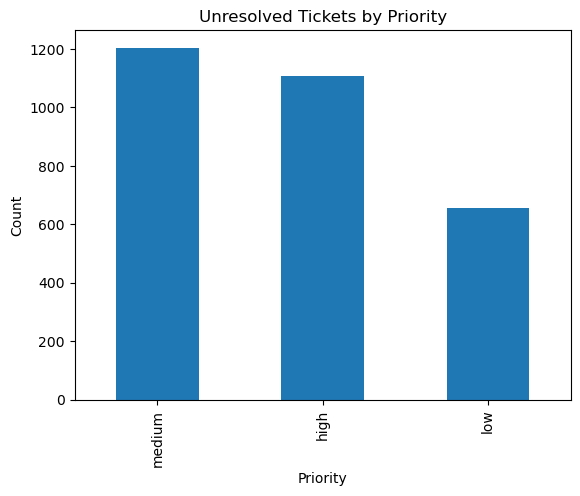

In [197]:
unresolved_by_priority = unresolved['priority'].value_counts()

plt.figure()

if unresolved_by_priority.empty:
    plt.text(0.5, 0.5, " Unresolved Tickets", ha='center', va='center')
    plt.axis('off')
else:
    unresolved_by_priority.plot(kind='bar')

plt.title("Unresolved Tickets by Priority")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()


In [199]:
resolved_df = df.dropna(subset=['resolved_date']).copy()

resolved_df['month'] = resolved_df['created_date'].dt.to_period('M').astype(str)

trend = resolved_df.groupby('month')['Resolution_Time_Hours'].mean().reset_index()
trend

,month,Resolution_Time_Hours
0,2024-01,16.929888


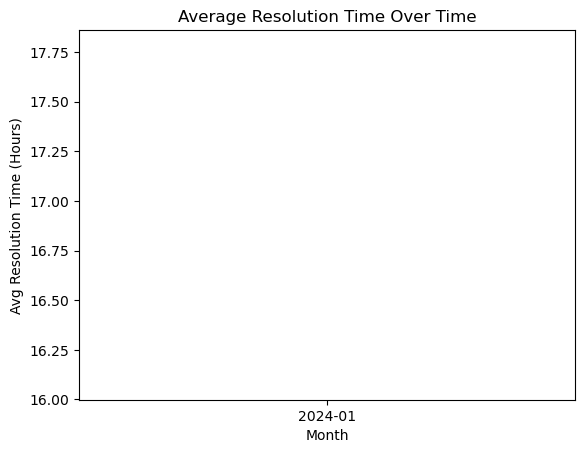

In [201]:
plt.figure()
plt.plot(trend['month'], trend['Resolution_Time_Hours'])
plt.title("Average Resolution Time Over Time")
plt.xlabel("Month")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


In [203]:
# Day4
# Compare Average Resolution Time across:
# Countries or Regions
# Issue Categories or Ticket Types
# Perform comparison specifically for High-Priority tickets
# Identify performance gaps, focusing on:
# Regions with slower resolution times
# Categories where high-priority tickets are delayed
# Create visualizations:
# Comparative bar chart for overall performance
# Comparative chart for high-priority tickets

resolved_df = df.dropna(subset=['resolved_date']).copy()


In [205]:
country_avg = resolved_df.groupby('country')['Resolution_Time_Hours'].mean().reset_index()
country_avg


,country,Resolution_Time_Hours
0,India,16.929888


In [207]:
category_avg = resolved_df.groupby('category')['Resolution_Time_Hours'].mean().reset_index()
category_avg


,category,Resolution_Time_Hours
0,Billing and Payments,18.135405
1,Customer Service,23.376243
2,General Inquiry,32.167959
3,Human Resources,29.526012
4,IT Support,12.387710
5,Product Support,17.493478
6,Returns and Exchanges,24.399090
7,Sales and Pre-Sales,24.159494
8,Service Outages and Maintenance,10.573501
9,Technical Support,11.900270


In [209]:
high_priority_df = resolved_df[resolved_df['priority'].str.lower() == 'high']


In [211]:
high_country_avg = high_priority_df.groupby('country')['Resolution_Time_Hours'].mean().reset_index()
high_country_avg


,country,Resolution_Time_Hours
0,India,3.501345


In [213]:
high_category_avg = high_priority_df.groupby('category')['Resolution_Time_Hours'].mean().reset_index()
high_category_avg


,category,Resolution_Time_Hours
0,Billing and Payments,3.519851
1,Customer Service,3.530914
2,General Inquiry,3.375000
3,Human Resources,3.368421
4,IT Support,3.599201
5,Product Support,3.474554
6,Returns and Exchanges,3.380952
7,Sales and Pre-Sales,3.414286
8,Service Outages and Maintenance,3.486523
9,Technical Support,3.486136


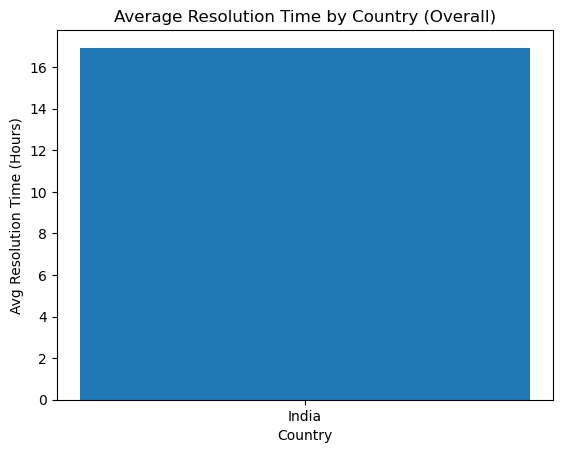

In [215]:
plt.figure()
plt.bar(country_avg['country'], country_avg['Resolution_Time_Hours'])
plt.title("Average Resolution Time by Country (Overall)")
plt.xlabel("Country")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


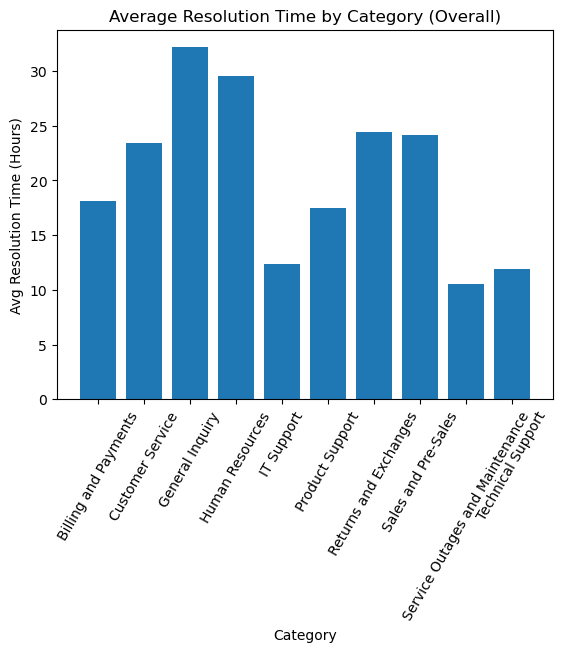

In [217]:
plt.figure()
plt.bar(category_avg['category'], category_avg['Resolution_Time_Hours'])
plt.xticks(rotation=60)
plt.title("Average Resolution Time by Category (Overall)")
plt.xlabel("Category")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


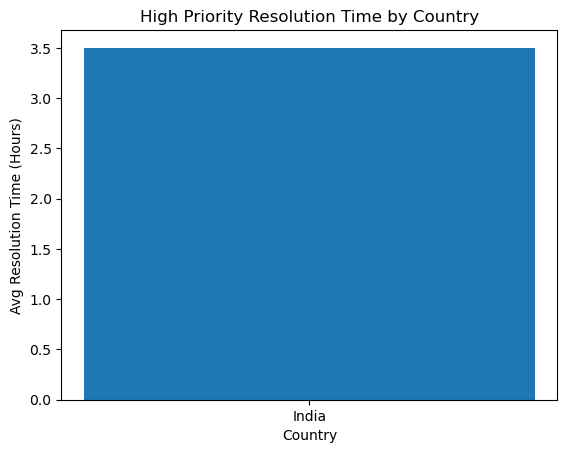

In [219]:
plt.figure()
plt.bar(high_country_avg['country'], high_country_avg['Resolution_Time_Hours'])
plt.title("High Priority Resolution Time by Country")
plt.xlabel("Country")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


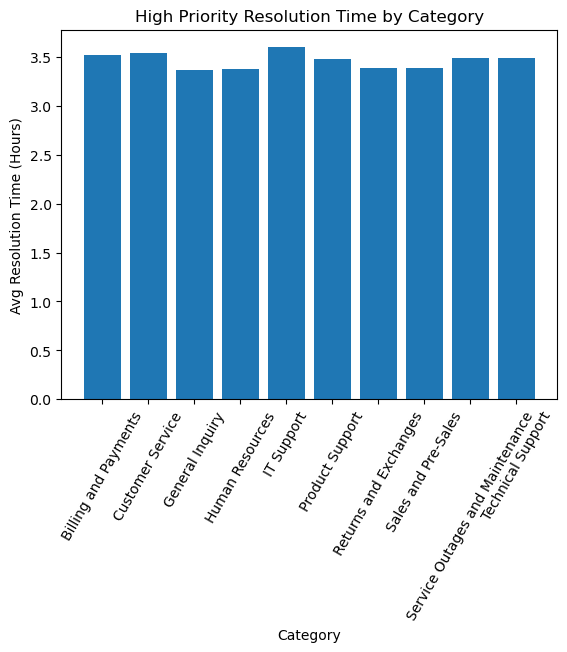

In [149]:
plt.figure()
plt.bar(high_category_avg['category'], high_category_avg['Resolution_Time_Hours'])
plt.xticks(rotation=60)
plt.title("High Priority Resolution Time by Category")
plt.xlabel("Category")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


In [227]:
df.to_csv("support_tickets_(module 5).csv", index=False)


In [231]:
from IPython.display import display, HTML

display(HTML("<h2 style='color:black;'>Module6</h2>"))


In [229]:
# Module 6 – Day 1 (Monday)
# Geographic Ticket Concentration
# Identify geographic dimensions in the dataset:
# Country
# Region
# Latitude
# Longitude
# Calculate ticket count by region or country
# Create visualizations:
# Heatmap showing ticket concentration by region
# Bar chart showing ticket count by region
# Analyze:
# Regions with highest and lowest ticket volume
# Possible operational reasons for high concentration
# Submission
# Heatmap and bar chart
Geographic insight summary


import pandas as pd
import matplotlib.pyplot as plt
df.to_csv("support_tickets_(module 5).csv", index=False)


In [237]:
import numpy as np

countries = ['India', 'USA', 'UK', 'Germany', 'Canada', 'Australia']

df['country'] = np.random.choice(countries, size=len(df), p=[0.4, 0.15, 0.15, 0.1, 0.1, 0.1])



In [239]:
df['country'].value_counts()


country
India        11834
UK            4534
USA           4518
Canada        2957
Germany       2936
Australia     2872
Name: count, dtype: int64

In [241]:
df.to_csv("support_tickets_with_diff_countries.csv", index=False)


In [249]:
import pandas as pd
import matplotlib.pyplot as plt
df.to_csv("support_tickets_with_diff_countries.csv", index=False)


In [265]:
ticket_count = df['country'].value_counts().reset_index()
ticket_count.columns = ['country', 'ticket_count']
ticket_count


,country,ticket_count
0,India,11834
1,UK,4534
2,USA,4518
3,Canada,2957
4,Germany,2936
5,Australia,2872


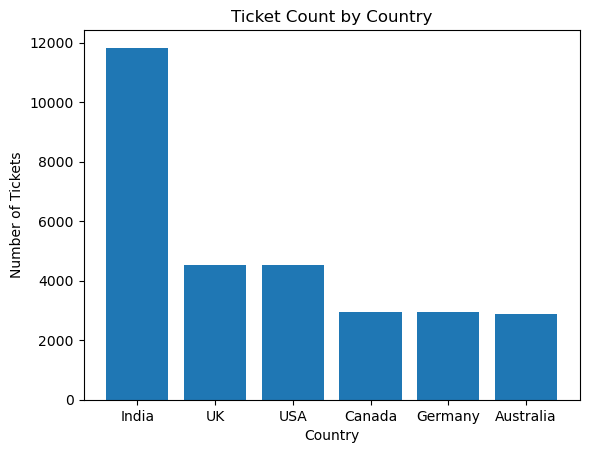

In [267]:
plt.figure()
plt.bar(ticket_count['country'], ticket_count['ticket_count'])
plt.title("Ticket Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Tickets")
plt.show()


In [263]:
region_map = {
    'India': ('Asia', 20.5937, 78.9629),
    'USA': ('North America', 37.0902, -95.7129),
    'UK': ('Europe', 55.3781, -3.4360),
    'Germany': ('Europe', 51.1657, 10.4515),
    'Canada': ('North America', 56.1304, -106.3468),
    'Australia': ('Oceania', -25.2744, 133.7751)
}

df[['region','latitude','longitude']] = df['country'].apply(
    lambda x: pd.Series(region_map[x])
)



In [269]:
ticket_by_region = df['region'].value_counts().reset_index()
ticket_by_region.columns = ['region', 'ticket_count']
ticket_by_region


,region,ticket_count
0,Asia,11834
1,North America,7475
2,Europe,7470
3,Oceania,2872


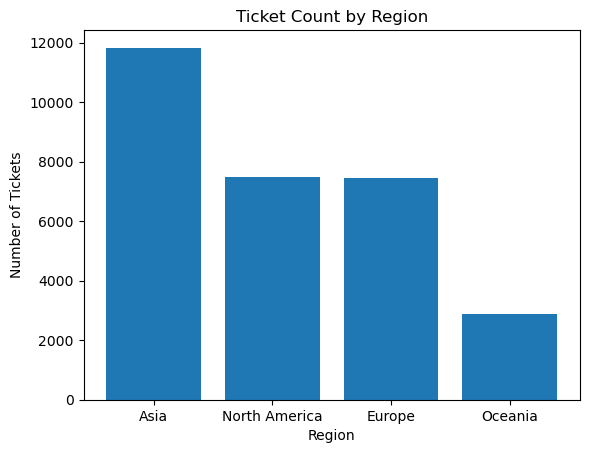

In [271]:
plt.figure()
plt.bar(ticket_by_region['region'], ticket_by_region['ticket_count'])
plt.title("Ticket Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")
plt.show()


In [275]:
heatmap_data = df.pivot_table(
    index='region',
    values='ticket_id',
    aggfunc='count'
)
heatmap_data


,ticket_id
region,
Asia,11834
Europe,7470
North America,7475
Oceania,2872


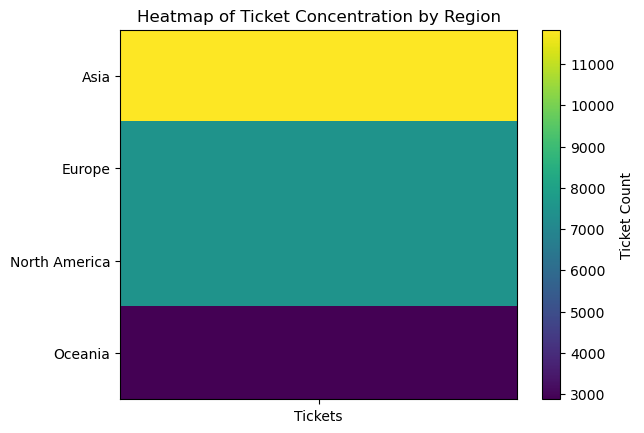

In [279]:
plt.figure()
plt.imshow(heatmap_data, aspect='auto')
plt.colorbar(label='Ticket Count')
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xticks([0], ['Tickets'])
plt.title("Heatmap of Ticket Concentration by Region")
plt.show()


In [281]:
highest = ticket_by_region.iloc[0]
lowest = ticket_by_region.iloc[-1]

print("Highest ticket volume region:", highest['region'])
print("Lowest ticket volume region:", lowest['region'])

Highest ticket volume region: Asia
Lowest ticket volume region: Oceania


In [283]:
df.to_csv("support_tickets_with_regions.csv", index=False)

In [285]:
# Day 2 (Tuesday)
# Category-Level Geographic Analysis
# Identify issue categories in the dataset
# Calculate ticket count by issue category for each region
# Use latitude and longitude to map issue categories geographically
# Create visualizations:
# Geo-map or scatter map of issue categories by location
# Comparative chart of issue categories across regions
# Analyze:
# Dominant issue categories per region
# Regional patterns in issue types
# Submission
# Geo-visualization and comparative chart
# Category-level geographic insights

import pandas as pd
import matplotlib.pyplot as plt
df.to_csv("support_tickets_with_regions.csv", index=False)


In [287]:
df['category'].value_counts()


category
Technical Support                  8617
Product Support                    5539
Customer Service                   4482
IT Support                         3500
Billing and Payments               3017
Returns and Exchanges              1467
Service Outages and Maintenance    1157
Sales and Pre-Sales                 885
Human Resources                     568
General Inquiry                     419
Name: count, dtype: int64

In [289]:
category_region_count = pd.pivot_table(
    df,
    index='region',
    columns='category',
    values='ticket_id',
    aggfunc='count',
    fill_value=0
)

category_region_count


category,Billing and Payments,Customer Service,General Inquiry,Human Resources,IT Support,Product Support,Returns and Exchanges,Sales and Pre-Sales,Service Outages and Maintenance,Technical Support
region,,,,,,,,,,
Asia,1227,1769,134,220,1395,2202,598,348,463,3478
Europe,714,1111,121,130,901,1377,375,224,289,2228
North America,811,1156,115,161,865,1396,355,219,288,2109
Oceania,265,446,49,57,339,564,139,94,117,802


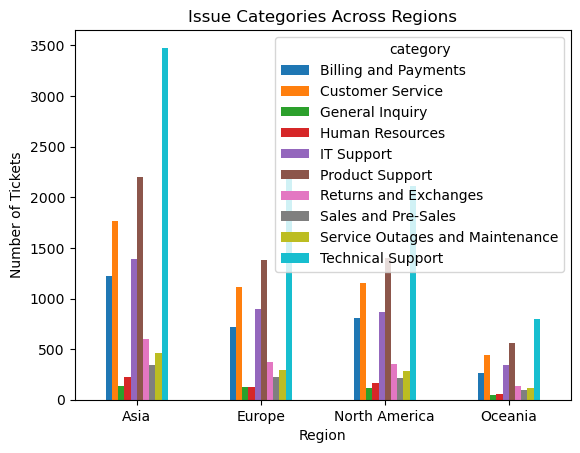

In [291]:
category_region_count.plot(kind='bar')
plt.title("Issue Categories Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=0)
plt.show()


In [293]:
df[['region','latitude','longitude']].head()


,region,latitude,longitude
0,Europe,55.3781,-3.4360
1,Europe,51.1657,10.4515
2,North America,37.0902,-95.7129
3,North America,56.1304,-106.3468
4,Asia,20.5937,78.9629


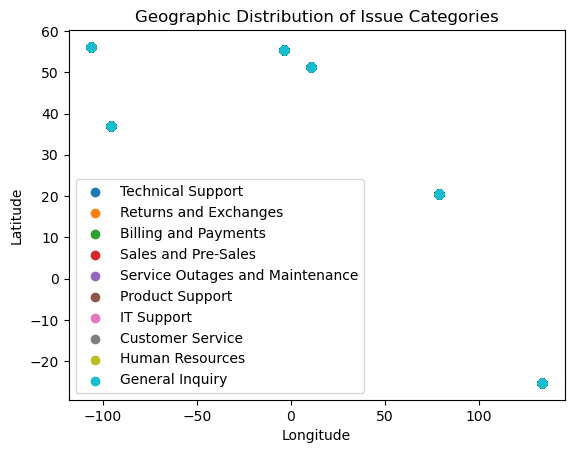

In [295]:
plt.figure()

for cat in df['category'].unique():
    temp = df[df['category'] == cat]
    plt.scatter(temp['longitude'], temp['latitude'], label=cat)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Issue Categories")
plt.legend()
plt.show()


In [297]:
dominant_category = category_region_count.idxmax(axis=1)
dominant_category


region
Asia             Technical Support
Europe           Technical Support
North America    Technical Support
Oceania          Technical Support
dtype: object

In [299]:
print("Dominant issue categories by region:")
print(dominant_category)


Dominant issue categories by region:
region
Asia             Technical Support
Europe           Technical Support
North America    Technical Support
Oceania          Technical Support
dtype: object


In [5]:
# Geographic Performance Comparison
# Identify performance measures:
# Resolution Time
# Average Resolution Time
# Analyze performance by region or country:
# Calculate average resolution time for each region
# Create visualizations:
# Bar chart: Region vs Average Resolution Time
# Heatmap: Region vs Average Resolution Time
# Analyze:
# Regions with fastest and slowest resolution
# Whether high-ticket-volume regions also have poor performance
# Need:Performance comparison charts
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("support_tickets_with_regions.csv")


In [7]:
resolved_df = df.dropna(subset=['resolved_date']).copy()


In [9]:
resolved_df['Resolution_Time_Hours'].head()


0     4
1    20
3    13
4     2
5     2
Name: Resolution_Time_Hours, dtype: int64

In [11]:
region_performance = resolved_df.groupby('region')['Resolution_Time_Hours'].mean().reset_index()

region_performance


,region,Resolution_Time_Hours
0,Asia,16.677769
1,Europe,16.957615
2,North America,17.378519
3,Oceania,16.733307


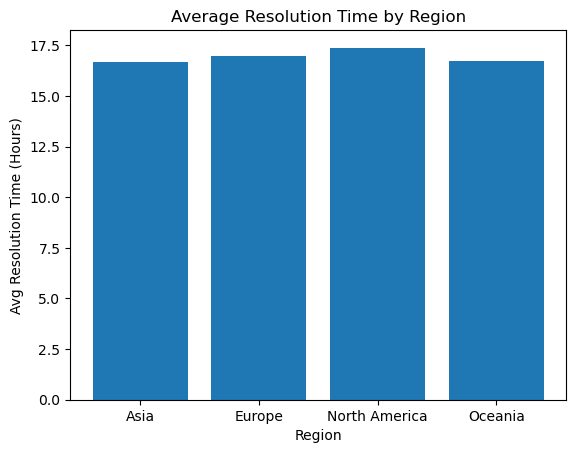

In [13]:
plt.figure()
plt.bar(region_performance['region'], region_performance['Resolution_Time_Hours'])

plt.title("Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Avg Resolution Time (Hours)")
plt.show()


In [15]:
heatmap_data = region_performance.set_index('region')


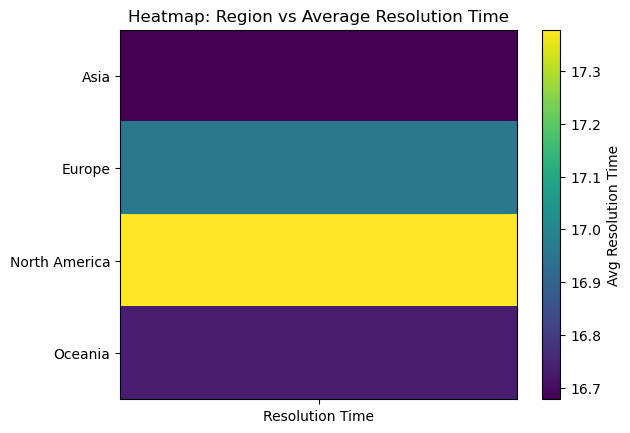

In [17]:
plt.figure()

plt.imshow(heatmap_data, aspect='auto')
plt.colorbar(label='Avg Resolution Time')

plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xticks([0], ['Resolution Time'])

plt.title("Heatmap: Region vs Average Resolution Time")

plt.show()


In [19]:
fastest = region_performance.loc[
    region_performance['Resolution_Time_Hours'].idxmin()
]

slowest = region_performance.loc[
    region_performance['Resolution_Time_Hours'].idxmax()
]

print("Fastest Region:", fastest['region'])
print("Slowest Region:", slowest['region'])


Fastest Region: Asia
Slowest Region: North America


In [25]:
ticket_volume = df['region'].value_counts().reset_index()
ticket_volume.columns = ['region','ticket_count']

comparison = pd.merge(region_performance,
                      ticket_volume,
                      on='region')

comparison


,region,Resolution_Time_Hours,ticket_count
0,Asia,16.677769,11834
1,Europe,16.957615,7470
2,North America,17.378519,7475
3,Oceania,16.733307,2872


In [27]:
# Cluster Size, Performance Impact  and Final Insights
# Identify clusters or grouped issue patterns in the dataset:
# Issue category clusters or derived clusters
# Calculate:
# Cluster size (number of tickets per cluster)
# Average resolution time or performance score per cluster
# Analyze relationship between:
# Cluster size and performance measure
# Create visualizations:
# Scatter plot: Cluster size vs Performance measure
# Bar chart: Cluster vs Average Resolution Time
# Write final insights:
# Clusters causing performance degradation
# Systemic or repetitive issue patterns
# Need:
# Cluster-performance charts
# Final performance insights and recommendations
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("support_tickets_with_regions.csv")


In [29]:
df['Cluster_ID'].value_counts()


Cluster_ID
1.0    10178
0.0     9673
2.0     5671
3.0     4129
Name: count, dtype: int64

In [31]:
resolved_df = df.dropna(subset=['resolved_date']).copy()


In [33]:
cluster_size = resolved_df.groupby('Cluster_ID')['ticket_id'].count().reset_index()

cluster_size.columns = ['Cluster_ID', 'Cluster_Size']

cluster_size


,Cluster_ID,Cluster_Size
0,0.0,8735
1,1.0,9181
2,2.0,5056
3,3.0,3714


In [35]:
cluster_performance = resolved_df.groupby('Cluster_ID')['Resolution_Time_Hours'].mean().reset_index()

cluster_performance.columns = ['Cluster_ID', 'Avg_Resolution_Time']

cluster_performance


,Cluster_ID,Avg_Resolution_Time
0,0.0,3.498912
1,1.0,12.563446
2,2.0,48.816653
3,3.0,15.903608


In [37]:
cluster_analysis = pd.merge(cluster_size,
                            cluster_performance,
                            on='Cluster_ID')

cluster_analysis


,Cluster_ID,Cluster_Size,Avg_Resolution_Time
0,0.0,8735,3.498912
1,1.0,9181,12.563446
2,2.0,5056,48.816653
3,3.0,3714,15.903608


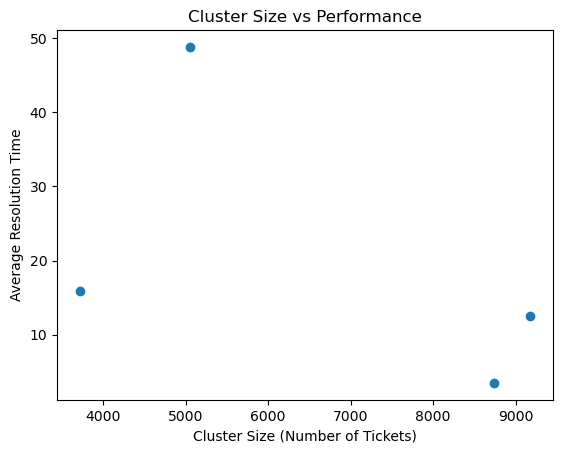

In [39]:
# Scatter plot: Cluster size vs Performance measure
plt.figure()

plt.scatter(cluster_analysis['Cluster_Size'],
            cluster_analysis['Avg_Resolution_Time'])

plt.title("Cluster Size vs Performance")
plt.xlabel("Cluster Size (Number of Tickets)")
plt.ylabel("Average Resolution Time")

plt.show()


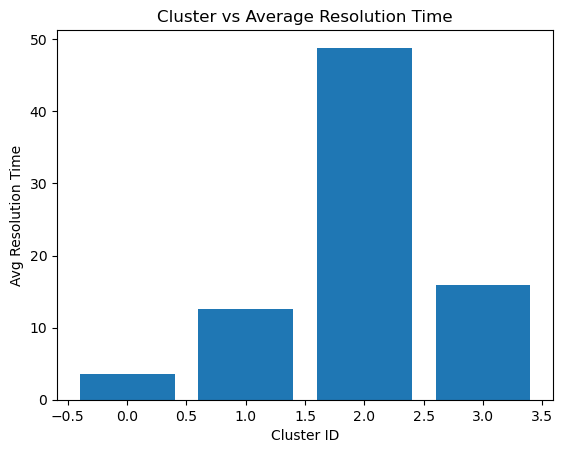

In [41]:
plt.figure()

plt.bar(cluster_analysis['Cluster_ID'],
        cluster_analysis['Avg_Resolution_Time'])

plt.title("Cluster vs Average Resolution Time")
plt.xlabel("Cluster ID")
plt.ylabel("Avg Resolution Time")

plt.show()


In [43]:
# Clusters causing performance degradation
slow_clusters = cluster_analysis.sort_values(
    by='Avg_Resolution_Time',
    ascending=False
)

slow_clusters.head()


,Cluster_ID,Cluster_Size,Avg_Resolution_Time
2,2.0,5056,48.816653
3,3.0,3714,15.903608
1,1.0,9181,12.563446
0,0.0,8735,3.498912
